In [1]:

import pandas as pd

df = pd.read_csv('data.csv')
df


,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [4]:
y = df['Weight']
y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64

In [5]:
X = df.drop('Height', axis=1)
X

,Weight
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


In [6]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:

X_train

,Weight
10,66.28
5,58.57
2,54.48
4,57.20
0,52.21
11,68.10
7,61.29
3,55.84
14,74.46
8,63.11


In [8]:

X_test

,Weight
9,64.47
1,53.12
12,69.92
13,72.19
6,59.93


# # linear model


In [9]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_lr_train_pred = lr.predict(X_train)

In [11]:


y_lr_train_pred

array([66.28, 58.57, 54.48, 57.2 , 52.21, 68.1 , 61.29, 55.84, 74.46,
       63.11])

In [12]:
# Predict the target variable on the test set
y_lr_test_pred = lr.predict(X_test)


In [13]:

y_lr_test_pred

array([64.47, 53.12, 69.92, 72.19, 59.93])

In [14]:

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [15]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)
     

LR MSE (Train):  1.5146129380243426e-29
LR R2 (Train):  1.0
LR MSE (Test):  1.0097419586828952e-29
LR R2 (Test):  1.0


In [16]:

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [17]:

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.0,1.0


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [19]:

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)
     

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [21]:

rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.368806,0.968205,1.569628,0.966921


In [22]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [23]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.0,1.0
1,Random forest,1.368806,0.968205,1.569628,0.966921


Text(0.5, 0, 'Experimental LogS')

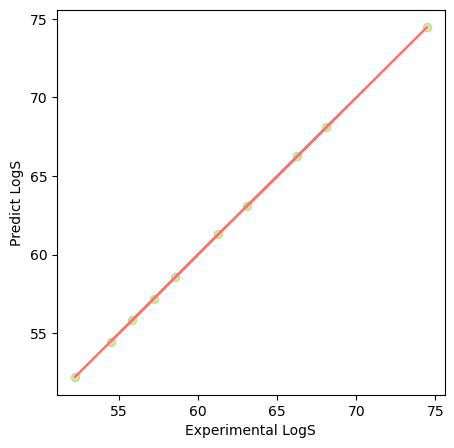

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')